# Gentic Disorder Prediction

Dataset from https://www.kaggle.com/datasets/aibuzz/predict-the-genetic-disorders-datasetof-genomes

In [1]:
# import libraries
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
sns.set_style('darkgrid')

## Load Data

In [2]:
#load the data into a dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#inspect the dimensons
print('There are {} rows and {} columns for training.'.format(train_df.shape[0], train_df.shape[1]))
print('There are {} rows and {} columns for testing.'.format(test_df.shape[0], test_df.shape[1]))

There are 22083 rows and 45 columns for training.
There are 9465 rows and 43 columns for testing.


## Data cleaning

In [3]:
pd.options.display.max_rows = 4000

In [4]:
# Check data was loaded properly
train_df.head(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [5]:
# get types for each variable and check non-null count
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [6]:
# get rid of columns like id and names that have no impact
train_df = train_df[["Patient Age", 
                    "Genes in mother's side", 
                    "Inherited from father", 
                    "Maternal gene", 
                    "Paternal gene", 
                    "Blood cell count (mcL)",
                    "Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Test 1",
                    "Test 2",
                    "Test 3",
                    "Test 4",
                    "Test 5",
                    "Follow-up", 
                    "Gender", 
                    "Birth asphyxia", 
                    "Autopsy shows birth defect (if applicable)",
                    "Folic acid details (peri-conceptional)", 
                    "H/O serious maternal illness", 
                    "H/O radiation exposure (x-ray)", 
                    "H/O substance abuse", 
                    "Assisted conception IVF/ART", 
                    "History of anomalies in previous pregnancies", 
                    "No. of previous abortion", 
                    "Birth defects", 
                    "White Blood cell count (thousand per microliter)", 
                    "Blood test result", 
                    "Symptom 1", 
                    "Symptom 2", 
                    "Symptom 3", 
                    "Symptom 4", 
                    "Symptom 5", 
                    "Genetic Disorder", 
                    "Disorder Subclass"]]

train_df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,0.0,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,Deceased,Tachypnea,Normal,NaN,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,0.0,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,0.0,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,0.0,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,Deceased,NaN,Normal,0.0,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,Alive,Normal (30-60),NaN,NaN,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,Alive,Tachypnea,Normal,0.0,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,0.0,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,0.0,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


Above, I removed columns that I assume will have no impact on my predictions, such as the Patient's id or institutions name.

In [7]:
# get types for each variable and check non-null count
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Status                                            22083 non-null  object 
 7   Respiratory Rate (breaths/min)                    19934 non-null  object 
 8   Heart Rate (rates/min                             19970 non-null  object 
 9   Test 1           

In [8]:
# Remove rows missing both targets
train_df = train_df[(train_df["Genetic Disorder"].isnull() != True) & (train_df["Disorder Subclass"].isnull() != True)]

Above, I removed rows that were missing both of the target variables because these can not help me learn the connection between the medical information and target variables.

In [9]:
#Check all columns for invalid values
for col in train_df.columns:
    print(train_df[col].value_counts(dropna=False))
    print()

Patient Age
4.0     1170
5.0     1168
9.0     1166
12.0    1156
2.0     1152
0.0     1152
3.0     1140
7.0     1133
6.0     1127
13.0    1125
1.0     1124
8.0     1109
14.0    1094
11.0    1089
10.0    1082
NaN     1060
Name: count, dtype: int64

Genes in mother's side
Yes    10743
No      7304
Name: count, dtype: int64

Inherited from father
No     10773
Yes     7054
NaN      220
Name: count, dtype: int64

Maternal gene
Yes    8803
No     7173
NaN    2071
Name: count, dtype: int64

Paternal gene
No     10239
Yes     7808
Name: count, dtype: int64

Blood cell count (mcL)
4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: count, Length: 18047, dtype: int64

Status
Alive       9061
Deceased    8986
Name: count, dtype: int64

Respiratory Rate (breaths/min)
Normal (30-60)    8281
Tachypnea         8196
NaN               1570
Name: count, dtype: int64

Heart Rate (rates/min
Normal   

Above is printed out all of the values for each of the columns. This allows me to quickly check the values to ensure they are all valid and make sense. For example, I can see there are values of "-" that should be replaced with nan and values of -99 that should be replaced with nan since we don't know what is meant be this value.

Some columns like tests and autopsy have little to no information (ex. tests only have yes responses or nan) so these columns can be dropped

In [10]:
# replace no responses with nan
train_df = train_df.replace('-', np.nan)

# replace no responses or invalid inputs with nan
test_df = test_df.replace('-', np.nan)
test_df = test_df.replace('-99', np.nan)

In [11]:
#Check all columns for invalid values
for col in train_df.columns:
    print(train_df[col].value_counts(dropna=False))
    print()

Patient Age
4.0     1170
5.0     1168
9.0     1166
12.0    1156
2.0     1152
0.0     1152
3.0     1140
7.0     1133
6.0     1127
13.0    1125
1.0     1124
8.0     1109
14.0    1094
11.0    1089
10.0    1082
NaN     1060
Name: count, dtype: int64

Genes in mother's side
Yes    10743
No      7304
Name: count, dtype: int64

Inherited from father
No     10773
Yes     7054
NaN      220
Name: count, dtype: int64

Maternal gene
Yes    8803
No     7173
NaN    2071
Name: count, dtype: int64

Paternal gene
No     10239
Yes     7808
Name: count, dtype: int64

Blood cell count (mcL)
4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: count, Length: 18047, dtype: int64

Status
Alive       9061
Deceased    8986
Name: count, dtype: int64

Respiratory Rate (breaths/min)
Normal (30-60)    8281
Tachypnea         8196
NaN               1570
Name: count, dtype: int64

Heart Rate (rates/min
Normal   

In [12]:
# Check percent missing values for each column
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
print(percent_missing)

Patient Age                                          5.873552
Genes in mother's side                               0.000000
Inherited from father                                1.219039
Maternal gene                                       11.475592
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Status                                               0.000000
Respiratory Rate (breaths/min)                       8.699507
Heart Rate (rates/min                                8.466781
Test 1                                               8.716130
Test 2                                               8.799246
Test 3                                               8.693966
Test 4                                               8.721671
Test 5                                               8.843575
Follow-up                                            8.727212
Gender                                               8.716130
Birth as

Above, I checked the percentage of missing values for each column. Most of the columns have a relatively low percentage of missing values. I removed the columns H/O radiation exposure (x-ray), H/O substance abuse, and birth asphyxia due to high percentage of nans.

In [13]:
# Final columns
train_df = train_df[["Patient Age", 
                    "Genes in mother's side", 
                    "Inherited from father", 
                    "Maternal gene", 
                    "Paternal gene", 
                    "Blood cell count (mcL)",
                    "Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Folic acid details (peri-conceptional)", 
                    "H/O serious maternal illness", 
                    "Assisted conception IVF/ART", 
                    "History of anomalies in previous pregnancies", 
                    "No. of previous abortion", 
                    "Birth defects", 
                    "White Blood cell count (thousand per microliter)", 
                    "Blood test result", 
                    "Symptom 1", 
                    "Symptom 2", 
                    "Symptom 3", 
                    "Symptom 4", 
                    "Symptom 5", 
                    "Genetic Disorder", 
                    "Disorder Subclass"]]

test_df = test_df[["Patient Age", 
                    "Genes in mother's side", 
                    "Inherited from father", 
                    "Maternal gene", 
                    "Paternal gene", 
                    "Blood cell count (mcL)",
                    "Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Folic acid details (peri-conceptional)", 
                    "H/O serious maternal illness", 
                    "Assisted conception IVF/ART", 
                    "History of anomalies in previous pregnancies", 
                    "No. of previous abortion", 
                    "Birth defects", 
                    "White Blood cell count (thousand per microliter)", 
                    "Blood test result", 
                    "Symptom 1", 
                    "Symptom 2", 
                    "Symptom 3", 
                    "Symptom 4", 
                    "Symptom 5"]]

train_df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,High,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,Low,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,High,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,Low,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,Deceased,NaN,Normal,Low,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,Alive,Normal (30-60),NaN,Low,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,Alive,Tachypnea,Normal,Low,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,Low,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,Low,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
10,6.0,Yes,No,NaN,No,4.750824,Deceased,Tachypnea,NaN,Low,...,Singular,5.957321,abnormal,1.0,NaN,0.0,0.0,NaN,Single-gene inheritance diseases,Hemochromatosis


## Handle missing data

In [14]:
# count the frequency of missing values in each row
train_df.isnull().sum(axis=1).sort_values(ascending = False) 

5687     10
18594    10
18880     9
16313     9
2888      9
         ..
12911     0
12913     0
12915     0
12916     0
22082     0
Length: 18047, dtype: int64

In [15]:
# delete rows with 5 or more missing variables (in each row)
train_df = train_df[train_df.isnull().sum(axis=1) < 5] 

# recheck number of nulls in each row
train_df.isnull().sum(axis=1).sort_values(ascending = False) 

14407    4
14785    4
19654    4
2462     4
2463     4
        ..
14964    0
7135     0
7137     0
7141     0
22082    0
Length: 16738, dtype: int64

Above I deleted rows with 5 or more missing values because they do not have enough information to determine a link between medical history and target variables.

In [16]:
# get types for each variable and check number of non-null
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16738 entries, 2 to 22082
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       15951 non-null  float64
 1   Genes in mother's side                            16738 non-null  object 
 2   Inherited from father                             16578 non-null  object 
 3   Maternal gene                                     15150 non-null  object 
 4   Paternal gene                                     16738 non-null  object 
 5   Blood cell count (mcL)                            16738 non-null  float64
 6   Status                                            16738 non-null  object 
 7   Respiratory Rate (breaths/min)                    15545 non-null  object 
 8   Heart Rate (rates/min                             15578 non-null  object 
 9   Follow-up             

In [17]:
# replace nans with the most frequent responses in that column
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in train_df.columns:
    imp.fit(train_df[[col]])
    train_df[[col]] = imp.transform(train_df[[col]])

print(train_df)

       Patient Age Genes in mother's side Inherited from father Maternal gene  \
2              6.0                    Yes                    No            No   
3             12.0                    Yes                    No           Yes   
4             11.0                    Yes                    No           Yes   
5             14.0                    Yes                    No           Yes   
6              3.0                    Yes                    No           Yes   
...            ...                    ...                   ...           ...   
22076          0.0                    Yes                    No           Yes   
22078          4.0                    Yes                   Yes           Yes   
22079          8.0                     No                   Yes            No   
22080          8.0                    Yes                    No           Yes   
22082         11.0                    Yes                    No            No   

      Paternal gene  Blood 

To handle nans, I replaced all of them with the most common value in the column. This is a simple way to take a guess at what the value would be.

In [18]:
# get types for each variable and number of non-nulls
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16738 entries, 2 to 22082
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       16738 non-null  float64
 1   Genes in mother's side                            16738 non-null  object 
 2   Inherited from father                             16738 non-null  object 
 3   Maternal gene                                     16738 non-null  object 
 4   Paternal gene                                     16738 non-null  object 
 5   Blood cell count (mcL)                            16738 non-null  float64
 6   Status                                            16738 non-null  object 
 7   Respiratory Rate (breaths/min)                    16738 non-null  object 
 8   Heart Rate (rates/min                             16738 non-null  object 
 9   Follow-up             

## Handle datatypes

Below, I fixed all of the datatypes for each column. For example, Genes in mother's side is a boolean variable to I changed all the yes to true and all the nos to false and casted the column as a boolean. I also set columns such as patient age to ints since all the values are whole numbers. I also encoded columns such as Status using a dummy encoder to change categorical data into numerical data.

In [19]:
#training data
#switch yes/no responses to true/false to create booleans
train_df["Genes in mother's side"] = train_df["Genes in mother's side"].map(dict(Yes=True, No=False))
train_df["Inherited from father"] = train_df["Inherited from father"].map(dict(Yes=True, No=False))
train_df["Maternal gene"] = train_df["Maternal gene"].map(dict(Yes=True, No=False))
train_df["Paternal gene"] = train_df["Paternal gene"].map(dict(Yes=True, No=False))
train_df["Folic acid details (peri-conceptional)"] = train_df["Folic acid details (peri-conceptional)"].map(dict(Yes=True, No=False))
train_df["H/O serious maternal illness"] = train_df["H/O serious maternal illness"].map(dict(Yes=True, No=False))
train_df["Assisted conception IVF/ART"] = train_df["Assisted conception IVF/ART"].map(dict(Yes=True, No=False))
train_df["History of anomalies in previous pregnancies"] = train_df["History of anomalies in previous pregnancies"].map(dict(Yes=True, No=False))


#test data
#switch yes/no responses to true/false to create booleans
test_df["Genes in mother's side"] = test_df["Genes in mother's side"].map(dict(Yes=True, No=False))
test_df["Inherited from father"] = test_df["Inherited from father"].map(dict(Yes=True, No=False))
test_df["Maternal gene"] = test_df["Maternal gene"].map(dict(Yes=True, No=False))
test_df["Paternal gene"] = test_df["Paternal gene"].map(dict(Yes=True, No=False))
test_df["Folic acid details (peri-conceptional)"] = test_df["Folic acid details (peri-conceptional)"].map(dict(Yes=True, No=False))
test_df["H/O serious maternal illness"] = test_df["H/O serious maternal illness"].map(dict(Yes=True, No=False))
test_df["Assisted conception IVF/ART"] = test_df["Assisted conception IVF/ART"].map(dict(Yes=True, No=False))
test_df["History of anomalies in previous pregnancies"] = test_df["History of anomalies in previous pregnancies"].map(dict(Yes=True, No=False))

In [20]:
#training data
#set each column to its appropriate datatype
train_df["Patient Age"]  = train_df["Patient Age"].astype('int64')
train_df["Genes in mother's side"]  = train_df["Genes in mother's side"].astype('boolean')
train_df["Inherited from father"]  = train_df["Inherited from father"].astype('boolean')
train_df["Maternal gene"]  = train_df["Maternal gene"].astype('boolean')
train_df["Paternal gene"]  = train_df["Paternal gene"].astype('boolean')
train_df["Folic acid details (peri-conceptional)"]  = train_df["Folic acid details (peri-conceptional)"].astype('boolean')
train_df["H/O serious maternal illness"]  = train_df["H/O serious maternal illness"].astype('boolean')
train_df["Assisted conception IVF/ART"]  = train_df["Assisted conception IVF/ART"].astype('boolean')
train_df["History of anomalies in previous pregnancies"]  = train_df["History of anomalies in previous pregnancies"].astype('boolean')
train_df["No. of previous abortion"]  = train_df["No. of previous abortion"].astype('int64')
train_df["Symptom 1"]  = train_df["Symptom 1"].astype('boolean')
train_df["Symptom 2"]  = train_df["Symptom 2"].astype('boolean')
train_df["Symptom 3"]  = train_df["Symptom 3"].astype('boolean')
train_df["Symptom 4"]  = train_df["Symptom 4"].astype('boolean')
train_df["Symptom 5"]  = train_df["Symptom 5"].astype('boolean')

#create dummy values for categorical data
train_df = pd.get_dummies(train_df, columns=["Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Birth defects",
                    "Blood test result"])



#testing data
#set each column to its appropriate datatype
test_df["Genes in mother's side"]  = test_df["Genes in mother's side"].astype('boolean')
test_df["Inherited from father"]  = test_df["Inherited from father"].astype('boolean')
test_df["Maternal gene"]  = test_df["Maternal gene"].astype('boolean')
test_df["Paternal gene"]  = test_df["Paternal gene"].astype('boolean')
test_df["Folic acid details (peri-conceptional)"]  = test_df["Folic acid details (peri-conceptional)"].astype('boolean')
test_df["H/O serious maternal illness"]  = test_df["H/O serious maternal illness"].astype('boolean')
test_df["Assisted conception IVF/ART"]  = test_df["Assisted conception IVF/ART"].astype('boolean')
test_df["History of anomalies in previous pregnancies"]  = test_df["History of anomalies in previous pregnancies"].astype('boolean')
test_df["Symptom 1"]  = test_df["Symptom 1"].astype('boolean')
test_df["Symptom 2"]  = test_df["Symptom 2"].astype('boolean')
test_df["Symptom 3"]  = test_df["Symptom 3"].astype('boolean')
test_df["Symptom 4"]  = test_df["Symptom 4"].astype('boolean')
test_df["Symptom 5"]  = test_df["Symptom 5"].astype('boolean')

#create dummy values for categorical data
test_df = pd.get_dummies(test_df, columns=["Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Birth defects",
                    "Blood test result"])


# get types for each variable
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16738 entries, 2 to 22082
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       16738 non-null  int64  
 1   Genes in mother's side                            16738 non-null  boolean
 2   Inherited from father                             16738 non-null  boolean
 3   Maternal gene                                     16738 non-null  boolean
 4   Paternal gene                                     16738 non-null  boolean
 5   Blood cell count (mcL)                            16738 non-null  float64
 6   Folic acid details (peri-conceptional)            16738 non-null  boolean
 7   H/O serious maternal illness                      16738 non-null  boolean
 8   Assisted conception IVF/ART                       16738 non-null  boolean
 9   History of anomalies i

In [21]:
# get types for each variable
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       9465 non-null   int64  
 1   Genes in mother's side                            9465 non-null   boolean
 2   Inherited from father                             8914 non-null   boolean
 3   Maternal gene                                     5742 non-null   boolean
 4   Paternal gene                                     9465 non-null   boolean
 5   Blood cell count (mcL)                            9465 non-null   float64
 6   Folic acid details (peri-conceptional)            7373 non-null   boolean
 7   H/O serious maternal illness                      7385 non-null   boolean
 8   Assisted conception IVF/ART                       7380 non-null   boolean
 9   History of anomalie

In [22]:
# final check
train_df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Folic acid details (peri-conceptional),H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies,...,Follow-up_Low,Gender_Ambiguous,Gender_Female,Gender_Male,Birth defects_Multiple,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
2,6,True,False,False,False,4.893297,True,False,True,True,...,True,False,False,True,False,True,False,False,True,False
3,12,True,False,True,False,4.705280,False,True,True,True,...,False,False,False,True,False,True,False,True,False,False
4,11,True,False,True,True,4.720703,False,True,True,False,...,True,False,False,True,True,False,False,False,False,True
5,14,True,False,True,False,5.103188,False,False,True,False,...,True,False,True,False,True,False,False,False,True,False
6,3,True,False,True,True,4.901080,True,True,True,False,...,True,False,False,True,True,False,False,False,True,False
7,3,False,False,True,True,4.964816,True,True,False,True,...,True,False,False,True,False,True,False,True,False,False
8,11,False,False,True,False,5.209058,True,True,False,True,...,True,False,False,True,True,False,False,False,False,True
9,4,False,True,True,True,4.752272,True,False,True,True,...,True,False,False,True,True,False,True,False,False,False
11,7,False,False,False,True,4.848795,True,True,False,True,...,True,False,False,True,True,False,False,False,False,True
12,1,True,True,False,False,4.612265,True,False,True,True,...,False,False,False,True,False,True,False,False,False,True


In [23]:
# get column names
for col in train_df.columns:
    print('"' + col + '",')

"Patient Age",
"Genes in mother's side",
"Inherited from father",
"Maternal gene",
"Paternal gene",
"Blood cell count (mcL)",
"Folic acid details (peri-conceptional)",
"H/O serious maternal illness",
"Assisted conception IVF/ART",
"History of anomalies in previous pregnancies",
"No. of previous abortion",
"White Blood cell count (thousand per microliter)",
"Symptom 1",
"Symptom 2",
"Symptom 3",
"Symptom 4",
"Symptom 5",
"Genetic Disorder",
"Disorder Subclass",
"Status_Alive",
"Status_Deceased",
"Respiratory Rate (breaths/min)_Normal (30-60)",
"Respiratory Rate (breaths/min)_Tachypnea",
"Heart Rate (rates/min_Normal",
"Heart Rate (rates/min_Tachycardia",
"Follow-up_High",
"Follow-up_Low",
"Gender_Ambiguous",
"Gender_Female",
"Gender_Male",
"Birth defects_Multiple",
"Birth defects_Singular",
"Blood test result_abnormal",
"Blood test result_inconclusive",
"Blood test result_normal",
"Blood test result_slightly abnormal",


## Prepare for models

In [24]:
# seperate training data into x, y1(Genetic Disorder), and y2(Disorder Subclass)
train_x_df = train_df[["Patient Age",
                        "Genes in mother's side",
                        "Inherited from father",
                        "Maternal gene",
                        "Paternal gene",
                        "Blood cell count (mcL)",
                        "Folic acid details (peri-conceptional)",
                        "H/O serious maternal illness",
                        "Assisted conception IVF/ART",
                        "History of anomalies in previous pregnancies",
                        "No. of previous abortion",
                        "White Blood cell count (thousand per microliter)",
                        "Symptom 1",
                        "Symptom 2",
                        "Symptom 3",
                        "Symptom 4",
                        "Symptom 5",
                        "Status_Alive",
                        "Status_Deceased",
                        "Respiratory Rate (breaths/min)_Normal (30-60)",
                        "Respiratory Rate (breaths/min)_Tachypnea",
                        "Heart Rate (rates/min_Normal",
                        "Heart Rate (rates/min_Tachycardia",
                        "Follow-up_High",
                        "Follow-up_Low",
                        "Gender_Ambiguous",
                        "Gender_Female",
                        "Gender_Male",
                        "Birth defects_Multiple",
                        "Birth defects_Singular",
                        "Blood test result_abnormal",
                        "Blood test result_inconclusive",
                        "Blood test result_normal",
                        "Blood test result_slightly abnormal"]]

train_y1_df = train_df[["Genetic Disorder"]]

train_y2_df = train_df[["Disorder Subclass"]]

#encode categorical y1 into numerical labels 
enc1 = LabelEncoder()
enc1.fit_transform(train_y1_df)
train_y1_df = enc1.transform(train_y1_df).reshape(-1,1)

#encode categorical y2 into numerical labels 
enc2 = LabelEncoder()
enc2.fit_transform(train_y2_df)
train_y2_df = enc2.transform(train_y2_df).reshape(-1,1)

test_x_df = test_df

c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\preprocessing\_label.py:132: Da

Above, I set the xs to equal the medical history and the ys to equal the target variables. I also used a label encoder to encode the categorical y features into numerical labels.

In [25]:
#inspect the dimensons
print('There are {} rows and {} columns for training.'.format(train_x_df.shape[0], train_x_df.shape[1]))
print('There are {} rows and {} columns for target 1.'.format(train_y1_df.shape[0], train_y1_df.shape[1]))
print('There are {} rows and {} columns for target 2.'.format(train_y2_df.shape[0], train_y2_df.shape[1]))
print('There are {} rows and {} columns for testing.'.format(test_x_df.shape[0], test_x_df.shape[1]))

There are 16738 rows and 34 columns for training.
There are 16738 rows and 1 columns for target 1.
There are 16738 rows and 1 columns for target 2.
There are 9465 rows and 34 columns for testing.


In [26]:
# split training and test data for each y
X1_train, X1_test, y1_train, y1_test = train_test_split(train_x_df, train_y1_df, stratify = train_y1_df, test_size=0.33, random_state=7)
X2_train, X2_test, y2_train, y2_test = train_test_split(train_x_df, train_y2_df, stratify = train_y2_df, test_size=0.33, random_state=7)

Above I split my data into training and testing data. I created two groups of data, one that was stratified based on the first target variable and thus would be used to predict that variable and one that was stratified on the second target variable. 

In [27]:
# create dictionaries to hold scores for each model
genetic_disorder_score = {}
disorder_subclass_score = {}
total_score = {}

## Model: Random

This model represents the base for what can be done without machine learning and just using random guessing.

In [28]:
#create random y pred arrays
random1 = np.random.randint(3, size=X1_test.shape[0])
random2 = np.random.randint(9, size=X1_test.shape[0])

#get scores for each y
score1 = f1_score(y1_test, random1, average='macro')
score2 = f1_score(y2_test, random2, average='macro')

#add to dictionary
print(np.round(score1, 3))
genetic_disorder_score["Random"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Random"] = np.round(score2, 3)

#get total score
score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Random"] = score

0.305
0.092
Score: 0.198


## Model: K Nearest Neighbors

In [31]:
# k nearest neighbors with cross validation for y1
#set parameters
parameters = {'n_neighbors':[2, 3, 4, 5]}

#classifier
neigh = KNeighborsClassifier()

#grid search cross validation
clf = GridSearchCV(neigh, parameters)

clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

#fit and predict best estimator
neigh = clf.best_estimator_
neigh.fit(X1_train, y1_train.ravel())

test1_pred_df = neigh.predict(X1_test.values)

c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  Fi

KNeighborsClassifier(n_neighbors=2)
nan


In [33]:
# k nearest neighbors with cross validation for y2
parameters = {'n_neighbors':[8, 9, 10, 11, 12, 13, 14]}

neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)

clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

neigh = clf.best_estimator_
neigh.fit(X2_train, y2_train.ravel())

test2_pred_df = neigh.predict(X2_test.values)

c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  Fi

KNeighborsClassifier(n_neighbors=8)
nan


c:\Users\Mary Poissant\anaconda3\envs\surely2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [34]:
#get f1scores for each y
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["K Neighbors"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["K Neighbors"] = np.round(score2, 3)

#print total score
score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["K Neighbors"] = score

0.335
0.152
Score: 0.243


Above was the K nearest neighbors model. The f1 score for the first target variable was 0.335. The f1 score for the second target variable was 0.144. The averaged f1 score for this model was 0.24.

# Model: SVM

In [35]:
# svm with cross validation for y1
parameters = {'gamma':[.01, .1, 1, 10], 'C':[.1, 1, 10, 100]}

svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

svm = clf.best_estimator_
svm.fit(X1_train, y1_train.ravel())

test1_pred_df = svm.predict(X1_test)

In [ ]:
# svm with cross validation for y2
parameters = {'gamma':[.01, .1, 1, 10], 'C':[.1, 1, 10, 100]}

svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

svm = clf.best_estimator_
svm.fit(X2_train, y2_train.ravel())

test2_pred_df = svm.predict(X2_test)

SVC(C=10, gamma=0.01)
0.4028887970623643


In [ ]:
#check scores
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["SVC"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["SVC"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["SVC"] = score

0.454
0.234
Score: 0.344


Above was the SVM model. The f1 score for the first target variable was 0.454. The f1 score for the second target variable was 0.234. The averaged f1 score for this model was 0.344.

## Model: Decision Tree

In [ ]:
# decision tree with cross validation for y1
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X1_train, y1_train)

print(clf.best_estimator_)
print(clf.best_score_)

dtc = clf.best_estimator_
dtc.fit(X1_train, y1_train)

test1_pred_df = dtc.predict(X1_test)

DecisionTreeClassifier(max_depth=6)
0.5956827922970185


In [ ]:
# print feature importance
print(dtc.feature_importances_)

[0.         0.0928876  0.07505239 0.02313854 0.00727764 0.02052352
 0.         0.00410803 0.         0.         0.0023167  0.00768336
 0.14683406 0.22242119 0.15945482 0.14247356 0.08140395 0.
 0.         0.         0.         0.         0.         0.
 0.00223532 0.00651574 0.         0.         0.         0.
 0.         0.         0.         0.00567357]


In [ ]:
# decision tree with cross validation for y2
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X2_train, y2_train)

print(clf.best_estimator_)
print(clf.best_score_)

dtc = clf.best_estimator_
dtc.fit(X2_train, y2_train)

test2_pred_df = dtc.predict(X2_test)

DecisionTreeClassifier(max_depth=7)
0.38514263624407064


In [ ]:
# print feature importance
print(dtc.feature_importances_)

[0.00629744 0.08582461 0.07538968 0.02703734 0.02749483 0.02546522
 0.         0.         0.         0.00217784 0.00561944 0.01483785
 0.11321568 0.14125161 0.14858245 0.14791465 0.16471788 0.
 0.00226676 0.         0.         0.         0.         0.
 0.         0.00137688 0.         0.         0.00381396 0.
 0.         0.00354238 0.         0.00317349]


In [ ]:
#check scores
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Decision Tree"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Decision Tree"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Decision Tree"] = score

0.487
0.263
Score: 0.375


Above was the Decision Tree model. The f1 score for the first target variable was 0.487. The f1 score for the second target variable was 0.263. The averaged f1 score for this model was 0.375.

## Model: Random Forest

In [ ]:
# random forest with cross validation for y1
parameters = {'n_estimators': [10, 25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 8, 11, 14]
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

rfc = clf.best_estimator_
rfc.fit(X1_train, y1_train.ravel())

test1_pred_df = rfc.predict(X1_test)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=150)
0.6065625915972898


In [ ]:
# print feature importance
print(rfc.feature_importances_)

[0.05547039 0.0644692  0.05836113 0.03197492 0.03192695 0.11830209
 0.00765225 0.00878245 0.00829588 0.00744468 0.02815553 0.08781367
 0.08420332 0.11073747 0.08590244 0.07614307 0.04168366 0.00375998
 0.00369796 0.00488098 0.00489985 0.0039799  0.00383262 0.00400054
 0.00386934 0.00747479 0.00610348 0.00704807 0.00408937 0.00416653
 0.00722232 0.00800354 0.00763379 0.00801784]


In [ ]:
# random forest with cross validation for y2
parameters = {'n_estimators': [10, 25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 8, 11, 14]
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

rfc = clf.best_estimator_
rfc.fit(X2_train, y2_train.ravel())

test2_pred_df = rfc.predict(X2_test)

RandomForestClassifier(max_depth=8, max_features=None)
0.40190780873233134


In [ ]:
# print feature importance
print(rfc.feature_importances_)

[0.04680167 0.06100165 0.05223516 0.03277673 0.03233915 0.09324054
 0.00577948 0.00669495 0.00820533 0.00733351 0.02085395 0.06651461
 0.07917292 0.0972403  0.0993434  0.10087121 0.11106241 0.00323535
 0.00325339 0.0038919  0.00437527 0.00314355 0.00306597 0.0029673
 0.00320932 0.00508793 0.00591364 0.00650403 0.00366652 0.00363427
 0.00712216 0.00832692 0.00460948 0.006526  ]


In [ ]:
# check scores
core1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Random Forest"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Random Forest"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Random Forest"] = score

0.487
0.27
Score: 0.378


Above was the Random Forest model. The f1 score for the first target variable was 0.487. The f1 score for the second target variable was 0.268. The averaged f1 score for this model was 0.377.

## Model: MLP

In [ ]:
# multi layer perceptron with cross validation for y1
parameters = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [.01, .1, 1, 10],
    'learning_rate': ['constant','adaptive']
}

mlpc = MLPClassifier(max_iter=1000)
clf = GridSearchCV(mlpc, parameters)
clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

mlpc = clf.best_estimator_
mlpc.fit(X1_train, y1_train.ravel())

test1_pred_df = mlpc.predict(X1_test)

MLPClassifier(activation='tanh', alpha=0.1, learning_rate='adaptive',
              max_iter=1000, solver='sgd')
0.6235952629709717


In [ ]:
# multi layer perceptron with cross validation for y2
parameters = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [.01, .1, 1, 10],
    'learning_rate': ['constant','adaptive']
}

mlpc = MLPClassifier(max_iter=1000)
clf = GridSearchCV(mlpc, parameters)
clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

mlpc = clf.best_estimator_
mlpc.fit(X2_train, y2_train.ravel())

test2_pred_df = mlpc.predict(X2_test)

C:\Users\Mary Poissant\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=1, max_iter=1000, solver='sgd')
0.42179272773696186


In [ ]:
#check scores
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["MLP"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["MLP"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["MLP"] = score

0.538
0.24
Score: 0.389


Above was the neural net model. The f1 score for the first target variable was 0.525. The f1 score for the second target variable was 0.258. The averaged f1 score for this model was 0.391.

## Model: Naive Bayes

In [ ]:
# naive bayes for y1
gnbc = GaussianNB()
gnbc.fit(X1_train, y1_train.ravel())

test1_pred_df = gnbc.predict(X1_test)

In [ ]:
#naive bayes for y2
gnbc = GaussianNB()
gnbc.fit(X2_train, y2_train.ravel())

test2_pred_df = gnbc.predict(X2_test)

In [ ]:
# check scores
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Naive Bayes"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Naive Bayes"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Naive Bayes"] = score

0.393
0.291
Score: 0.342


Above was the naive bayes model. The f1 score for the first target variable was 0.393. The f1 score for the second target variable was 0.291. The averaged f1 score for this model was 0.342.

## Visualize and Compare Models

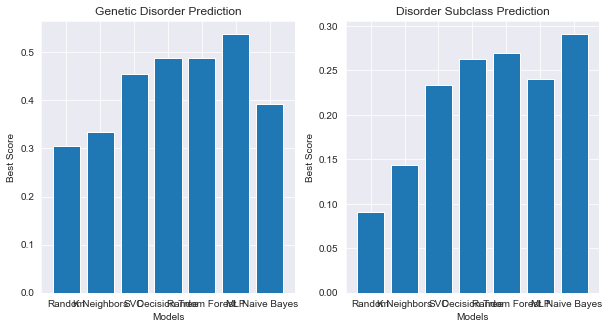

In [ ]:
#get models and scores list
models1 = list(genetic_disorder_score.keys())
scores1 = list(genetic_disorder_score.values())

plt.figure(figsize=(10,5))

#create bar plot for best score vs model for genetic disorder
plt.subplot(1, 2, 1)
plt.bar(models1, scores1)
plt.xlabel("Models")
plt.ylabel("Best Score")
plt.title("Genetic Disorder Prediction")

#get models and scores list
models2 = list(disorder_subclass_score.keys())
scores2 = list(disorder_subclass_score.values())

#create bar plot for best score vs model for disorder subclass
plt.subplot(1, 2, 2)
plt.bar(models2, scores2)
plt.xlabel("Models")
plt.ylabel("Best Score")
plt.title("Disorder Subclass Prediction")

plt.show()

Above is a visualization of the scores achieved for each target variable for each model. We can see all the models improved the random model.

In [ ]:
# get best model and score for y1
model1 = max(genetic_disorder_score, key=genetic_disorder_score.get)
score1 = genetic_disorder_score[model1]
print("Best model for genetic disorder prediction: " + model1)
print("     Score: " + str(score1))

# get best model and score for y2
model2 = max(disorder_subclass_score, key=disorder_subclass_score.get)
score2 = disorder_subclass_score[model2]
print("Best model for disorder subclass prediction: " + model2)
print("     Score: " + str(score2))

# get best model and score for total model
total_model = max(total_score, key=total_score.get)
print("Best total model: " + total_model)
print("     Score: " + str(total_score[total_model]))

# get best score for best induvidual models
best_total_score = np.round((score1/2) + (score2/2), 3)
print()
print("Best possible score: " + str(best_total_score))

Best model for genetic disorder prediction: MLP
     Score: 0.538
Best model for disorder subclass prediction: Naive Bayes
     Score: 0.291
Best total model: MLP
     Score: 0.389

Best possible score: 0.414


## Final Models

Below, I ran the best models that I found above on the full training data set and found the associated f1 scores.

In [ ]:
#best y1 classifier
mlpc = MLPClassifier(max_iter=1000, activation='tanh', alpha=0.1, learning_rate = 'adaptive', solver='sgd')
mlpc.fit(X1_train, y1_train.ravel())

test1_pred_df = mlpc.predict(X1_test)

In [ ]:
#best y2 classifier
gnbc = GaussianNB()
gnbc.fit(X2_train, y2_train.ravel())

test2_pred_df = gnbc.predict(X2_test)

In [ ]:
#final best scores
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print("Best score for genetic disorder model prediction: " + str(np.round(score1, 3)))
print("Best score for disorder subclass model prediction: " + str(np.round(score2, 3)))

score = np.round((score1/2) + (score2/2), 3)
print("Best score: " + str(score))

Best score for genetic disorder model prediction: 0.527
Best score for disorder subclass model prediction: 0.291
Best score: 0.409


## Confusion Matrix

Below is the confusion matrix for each target variable. Ideally, all the values woulbe along the diagonal. We can see that since many of the values are along the diagonal that these models work pretty well.

Confusion Matrix (rows: Predicted class, columns: True class):
[[2197  125  505]
 [ 105  178  290]
 [1019  115  990]]


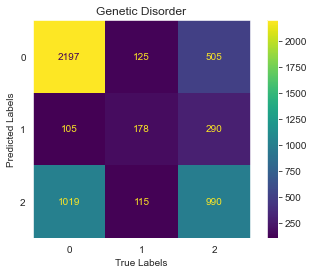

In [ ]:
# text confusion matrix
print("Confusion Matrix (rows: Predicted class, columns: True class):")
conf_mat = confusion_matrix(y_pred=test1_pred_df, y_true=y1_test)
print(conf_mat)

# figure confusion matrix
# conf_display = ConfusionMatrixDisplay.from_predictions(y_pred=test1_pred_df, y_true=y1_test, colorbar=False)
conf_display = ConfusionMatrixDisplay(conf_mat)
conf_display.plot()
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.title("Genetic Disorder")
plt.grid(False)
plt.show() 

Confusion Matrix (rows: Predicted class, columns: True class):
[[ 10   0  11   2   0  15   2   0   0]
 [  0  11   0   0   4   0   0   1  11]
 [  8   0 425  64   0  13 406  51   2]
 [ 23   0 263  67   0  38 112   2   1]
 [  0  32   1   0  39   0  41 131 125]
 [ 20   0  84  31   0  35  11   0   0]
 [  0   5 131   6   5   1 887 345  51]
 [  0   6  22   2  18   2 601 432 132]
 [  0  11   2   0  27   0 224 325 197]]


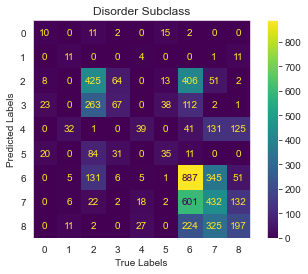

In [ ]:
# text confusion matrix
print("Confusion Matrix (rows: Predicted class, columns: True class):")
conf_mat = confusion_matrix(y_pred=test2_pred_df, y_true=y2_test)
print(conf_mat)

# figure confusion matrix
# conf_display = ConfusionMatrixDisplay.from_predictions(y_pred=test2_pred_df, y_true=y2_test, colorbar=False)
conf_display = ConfusionMatrixDisplay(conf_mat)
conf_display.plot()
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.title("Disorder Subclass")
plt.grid(False)
plt.show() 

## Feature Importance

In [ ]:
# get column names
for col in X1_train.columns:
    print('"' + col + '",')

"Patient Age",
"Genes in mother's side",
"Inherited from father",
"Maternal gene",
"Paternal gene",
"Blood cell count (mcL)",
"Folic acid details (peri-conceptional)",
"H/O serious maternal illness",
"Assisted conception IVF/ART",
"History of anomalies in previous pregnancies",
"No. of previous abortion",
"White Blood cell count (thousand per microliter)",
"Symptom 1",
"Symptom 2",
"Symptom 3",
"Symptom 4",
"Symptom 5",
"Status_Alive",
"Status_Deceased",
"Respiratory Rate (breaths/min)_Normal (30-60)",
"Respiratory Rate (breaths/min)_Tachypnea",
"Heart Rate (rates/min_Normal",
"Heart Rate (rates/min_Tachycardia",
"Follow-up_High",
"Follow-up_Low",
"Gender_Ambiguous",
"Gender_Female",
"Gender_Male",
"Birth defects_Multiple",
"Birth defects_Singular",
"Blood test result_abnormal",
"Blood test result_inconclusive",
"Blood test result_normal",
"Blood test result_slightly abnormal",


In order to evaluate the columns selected, I checked feature importance for both my decision tree classifier and random forrest classifer. This allows me to see the importance of each of the columns to determine if any of the columns is not needed. Using this, I can see the most important columns are "Patient Age", "Genes in mother's side", "Inherited from father", "Maternal gene", "Paternal gene", "Blood cell count (mcL)", "No. of previous abortion", "White Blood cell count (thousand per microliter)", "Symptom 1",  "Symptom 2", "Symptom 3", "Symptom 4", and "Symptom 5". 

It makes sense that the genetic information column for the parents is weighted high. It also makes sense that blood cell count, white blood cell count, and all the symptom columns are weighted high because these are common items to look at for diagnosing a genetic diorder. The one feature that confuses me is the number of previous abortions. This feature was not as strong as the others listed; however, it was used more than features such as respiratory rate and birth defects. This feature could be so useful because it could show a genetic disorder appearing in the fetus and leading to an abortion.

In the decision tree model, some of the features did not contribute at all; however, in the random forrest model all features contributed to the decision. When looking at the charts of the accuracy of all the models, we can see the random forrest model did much better than the decision tree model, showing the usefulness of using all the features. Due to this fact, we can conclude that all the features can be used to make the final decision.

## Exoloring Area Under the ROC Curve With Reression Models as Input

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf1 = LogisticRegression(solver="sag", max_iter = 1000).fit(X1_train, y1_train.ravel())
print(roc_auc_score(y1_train.ravel(), clf1.predict_proba(X1_train), multi_class='ovr'))
print(roc_auc_score(y1_test, clf1.predict_proba(X1_test), multi_class='ovr'))

clf2 = LogisticRegression(solver="sag", max_iter = 10000).fit(X2_train, y2_train.ravel())
print(roc_auc_score(y2_train.ravel(), clf2.predict_proba(X2_train), multi_class='ovr'))
print(roc_auc_score(y2_test, clf2.predict_proba(X2_test), multi_class='ovr'))

0.688178514762698
0.6799079724279494
0.872780166223183
0.8622426697544646
